# CLASIFICACIÓN DE PRECIOS DE TELÉFONOS MÓVILES

In [1]:
"""Todas las importaciones necesarias para el proyecto de unidad 2 de NRC_6278 """ 
#importación de librerias necesarias
import numpy as np
#importar libreria pandas para el dataset
import pandas as pd
#librería para los gráficos
import matplotlib.pyplot as plt
#importar librería para gráficos
import seaborn as sns
#librería para la división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#librería para el escalamiento de los datos 
from sklearn.preprocessing import StandardScaler
#librería para las métricas
from sklearn.metrics import accuracy_score

## Cargar el Dataset <br>


In [2]:
""" #importación del dataset train.csv en un dataframe   """
df = pd.read_csv("train.csv")
""" muestra las primeras 5 filas del dataframe """
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Descripción de la fuente del Dataset


El presente dataset esta enfocado en una tienda de telefonos en los cuales se ha obtenido los datos que se muestran la parte superior con diferentes atributos de entrada los cuales tiene como objetivo determinar el precio de los mismos. En este caso el precio no esta determinado con un valor sino mas bien son categorias (0,1,2,3). Los datos han sido obtenidos de https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## Explique el problema a resolver. 

En el presente proyecto se tiene como objetivo el poder determinar un clasificador enfocado en determinar la categoria de precio que tiene un teléfono móvil en función de las características o también denominadas atributos de entrada 

## Caracterización del Dataset


### Número de instancias en total

In [3]:
#contar registros del dataset
df.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

### Número de atributos de entrada, su significado y tipo

**El numero de atributos de entrada existentes en el set de datos es de 20 que son los siguientes:**

### VARIABLES DE ENTRADA

**battery_power:** variable continua que indica la energía total que una batería puede almacenar en un tiempo medida en mAh

**blue:** variable categorica que tiene valor de 0 o 1 e indica si se tiene bluethhoth o no

**clock_speed:** variable continua velocidad a la que el microprocesador ejecuta las instrucciones

**dual_sim:** variable categorica indica si el celular tiene dual sim o no

**fc:** variable continua indica los megapixeles de la camara delantera

**four_g:** variable categorica indica si tiene 4g o no

**int_memory:** continua indica la memoria interna en gigabytes

**m_dep:** variable continua indica la profundida o altura del movil en cm

**mobile_wt:** variable continua que indica el peso del movil

**n_cores:** categorica que indica el numero de cores del procesador

**pc:** continua indica los pixeles de la camara primaria

**px_height:** continua resolucion de los pixeles en cuanto altura

**px_width:** continua resolucion de los pixeles en ancho

**ram:** continua memoria ram del telefono

**sc_h:** continua altura de la pantala

**sc_w:** continua ancho de la pantalla

**talk_time:** continua tiempo que durará una sola carga de batería cuando esté hablando

**three_g:** categorica indica si tiene 3g

**touch_screen:** categorica indica si tiene pantalla tactil

**wifi:** categorica indica si el telefono tiene conexion wifi




### Atributo de salida, su significado y tipo
#### VARIABLES DE SALIDA
**price_range:** Variable Categorica que indica el rango en el cual se encuentra el precio del movil en 4 rangos (0,1,2,3)

In [4]:
#muestra la información (incluido el tipo de dato) de los 20 atributos de entrada.
df.drop('price_range', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## LIMPIEZA DE LOS DATOS

Lo primero que se llevara a cabo para el presente trabajo es el análisis del set de datos con el fin de determinar si existe inconvenientes o problemas para el posterior analisis. Lo primero que se pretende es analizar si tanto en el set de datos que hará referencia a los datos de entrenamiento y de prueba existe anomalías o problemas que dificulten posteriormente su uso y aplicación de los modelos.

In [5]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = df[['price_range']]
X = df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
#Separando las caracteristicas 


# Valores Nulos
Lo primero que se pretende es buscar la existencia de valores nulos en las instancias de las variables de entrada

In [6]:
#Comprobación de valores nulos en datos de entrada
X.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Como se puede observar en el conjunto de instancias de los valores de entrada no existen valores nulos por lo cual se puede continuar con el siguiente paso que es la comprobacion de valores nulos existentes en la variable objetivo.

In [7]:
#Comprobación de valores nulos en la variable objetivo
y.isnull().sum()

price_range    0
dtype: int64

De igual manera como se observa en los resultados en la variable objetivo tampoco existen valores nulos por lo cual se puede continuar con el siguiente paso. Se debe hacer una mención de que en el caso que hubiera existido valores nulos ya sea en las variables de entrada o en la variable objetivo se debería llevar a cabo una imputación pero para este proceso no es el caso.

## Valores Duplicados
Con el fin de continuar con la limpieza de los datos se procede a analizar si existe o no datos duplicados dentro de nuestras variables de entrada

In [8]:
#Comprobación de valores duplicados en los valores de entrada
X.duplicated().sum()

0

## SELECCIÓN DE CARACTERÍSTICAS

In [9]:
""" Compruebo con un bucle for en cada valor de entrada la correlacion con la variable de salida """
for a in df.columns :
    try :
        print(f'Corr {a}: {df[a].corr(df["price_range"])}')
    except :
        pass

Corr battery_power: 0.20072261211373096
Corr blue: 0.02057285406141851
Corr clock_speed: -0.00660569088173206
Corr dual_sim: 0.01744447923722471
Corr fc: 0.021998207776904265
Corr four_g: 0.014771711417239408
Corr int_memory: 0.04443495938898743
Corr m_dep: 0.0008530365050864332
Corr mobile_wt: -0.030302171314386415
Corr n_cores: 0.004399274799457283
Corr pc: 0.03359930021353949
Corr px_height: 0.1488575550004218
Corr px_width: 0.16581750172625512
Corr ram: 0.9170457362649908
Corr sc_h: 0.022986073167424424
Corr sc_w: 0.03871127166448418
Corr talk_time: 0.021858871162374775
Corr three_g: 0.023611216880045024
Corr touch_screen: -0.03041107189821801
Corr wifi: 0.01878481201278902
Corr price_range: 1.0


Como se puede observar existen unicamente 4 atributos o valores de entrada que presentan una alta correlacion con la variable objetivo las cuales son 'ram','px_height','px_width','battery_power' y con las que se procedera a trabajar a lo largo del presente analisis de clasificación.

## Remover Valores Atipicos
Con el fin de mantener un analisis correcto de los datos y adapatar de mejor forma el modelo se procede a eliminar el del set de datos aquellos valores que se encuentren alejados de la media o que puedan salir de la respuesta normal ya sea por errores u otros inconvenientes en la toma de datos

In [10]:
"""Genero un set con las instancias de mis atributos o caracteristicas seleciconas """
variables_seleccionadas = ['ram','px_height','px_width','battery_power']
#Remuevo Valores Atipicos en funcion de aquellos valores fuera de los cuartiles 
for a in variables_seleccionadas: 
    q1 = df[a].quantile(0.25)
    q3 = df[a].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    df = df[(df[a] > 0) & (df[a] < upper)]

## Selección de Caracteristicas 
Ahora ya con los datos atipicos eliminados se puede proceder a generar un nuevo subset de datos para el trabajo con el modelo

In [11]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = df[['price_range']]
#Separando las caracteristicas 
X = df[['ram','px_height','px_width','battery_power']]

In [12]:
#imprime las características que tiene mayor correlación
X.dtypes

ram              int64
px_height        int64
px_width         int64
battery_power    int64
dtype: object

In [13]:
#Imprimo los valores unicos de la variable de salida
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

## División del Set en Datos de Entrenamiento y de Prueba

In [14]:
#importo libreria para la division del set de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [15]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
#Determino el tamaño del set de entrenamiento
X_train.shape, X_test.shape

((1397, 4), (599, 4))

In [17]:
#Determino el tamaño del set de prueba
y_train.shape, y_test.shape

((1397, 1), (599, 1))

## Implementación Modelo de Naive-Bayes

In [18]:
#Importo libreria encargado del modelo de Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Defino el Modelo
gnb = GaussianNB()
#Entreno el modelo y aplico en el set de prueba
y_pred = gnb.fit(X_train, y_train).predict(X_test)


C:\Users\VINICIO BORJA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Evaluación


In [19]:
#Importo libreria para obtener el valor del accuracy o la matriz de confusion ademas de libreria para graficar
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

#Obtengo el accuracy del modelo de Naive Bayes
acc_score_naive = accuracy_score(y_test, y_pred)


print(acc_score_naive)


0.7696160267111853


In [20]:
#Obtengo la matriz de confusion para este modelo
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[123  18   0   0]
 [ 14 106  32   0]
 [  0  32 107  22]
 [  0   1  19 125]]


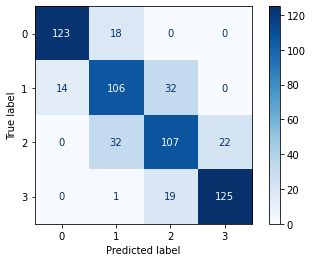

In [21]:
#Grafico la Matriz de Confusion
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['0',
 '1',
 '2',
 '3'], cmap=plt.cm.Blues)

In [22]:
#Importo la librria para generar un reporte con las principales metricas del modelo
from sklearn.metrics import classification_report
#Imprimo las metricas como el accuracy, precision, recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       141
           1       0.68      0.70      0.69       152
           2       0.68      0.66      0.67       161
           3       0.85      0.86      0.86       145

    accuracy                           0.77       599
   macro avg       0.78      0.77      0.77       599
weighted avg       0.77      0.77      0.77       599



In [23]:
#Importo libreria para obtener metricas para obtener precision recall f1
from sklearn.metrics import precision_recall_fscore_support as score
precision_naive,recall_naive,fscore_naive,support_naive=score(y_test,y_pred,average='macro')

## Hidden Markov Model

In [24]:
#Importo el modelo para el uso del modelo de Markov
from hmmlearn.hmm import GaussianHMM
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = df[['price_range']]
#Separando las caracteristicas 
X = df[['ram','px_height','px_width','battery_power']]

In [26]:
### Estandarización de la data ###
# importar metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [27]:
#Almacenamiento del objeto de ajuste para referencia posterior
#Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)


In [28]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

## Aplico Modelo de Markov

In [29]:
#Implemento el modelo de Markov
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=2000).fit(X)
# Predigo la secuencia optima de estados
y_pred_markov = model.predict(X)
y_pred_markov 

array([3, 2, 2, ..., 2, 1, 3], dtype=int64)

## Evaluación

In [30]:
#Implemento el mismo proceso que se mostro en la seccion de Naive Bayes para la evaluacion
from sklearn.metrics import accuracy_score
#Importo libreria para obtener metricas y matriz de confusion 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#Importo libreria para graficos
import matplotlib.pyplot as plt
#Obtengo el acuraccy del modelo
acc_score_markov = accuracy_score(y, y_pred_markov)

# impromo el accuracy
print(acc_score_markov)

0.15781563126252504


In [31]:
#Muestro la matriz de confusion para el modelo markov
cm_markov = confusion_matrix(y, y_pred_markov)
print(cm_markov)

[[  1 379  68  52]
 [115  85 136 163]
 [199   0 131 169]
 [214   0 186  98]]


<AxesSubplot:>

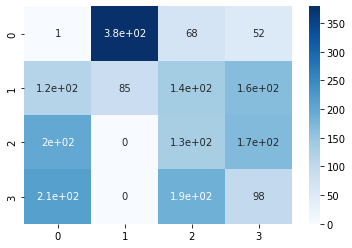

In [35]:
"""Grafico la matriz de confusion para el modelo markov """ 
sns.heatmap(confusion_matrix(y, y_pred_markov), annot=True, cmap="Blues")

In [32]:
#Imprimo variable de salida de test.
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [33]:
#Importo libreria para metricas y genero reporte con recall precision y accuracy
from sklearn.metrics import classification_report

""" Imprimo las metricas como el accuracy, precision, recall"""
print(classification_report(y, y_pred_markov))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.18      0.17      0.18       499
           2       0.25      0.26      0.26       499
           3       0.20      0.20      0.20       498

    accuracy                           0.16      1996
   macro avg       0.16      0.16      0.16      1996
weighted avg       0.16      0.16      0.16      1996



In [34]:

""" Imprimo las metricas como el accuracy, precision, recall """
precision_markov,recall_markov,fscore_markov,support_markov=score(y,y_pred_markov,average='macro')

## Aplico Modelo de Fuzzy Probabilistico con Algoritmo de CMeans

In [36]:
#Importo Libreria que permite usar el modelo mencionado anteriormente
from fcmeans import FCM

In [37]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = df[['price_range']]
#Separando las caracteristicas 
X = df[['ram','px_height','px_width','battery_power']]

In [38]:
### Estandarización de la data ###
# importar metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [39]:
#Almacenamiento del objeto de ajuste para referencia posterior
#Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [40]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

In [41]:
#Implemento el modelo fuzzy probabilistico
modelo_fuzzy = FCM(n_clusters=4,init=1.7,random_state=0, fuzzifier=2) #Seleccionamos 4 cluster
modelo_fuzzy.fit(X) ## X, numpy array. rows:samples columns:features

In [42]:
#Obtengo los centroides
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([0, 2, 2, ..., 2, 3, 0], dtype=int64)

## Evaluación

In [43]:
#Obtengo el accuracy del modelo fuzzy
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
#Imprimo el accuracy
print(acc_score_fuzzy)

0.15480961923847694


In [44]:
#Obtengo matriz de confusion 
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print(cm_fuzzy)

[[ 85   6  62 347]
 [145  86 131 137]
 [169 178 138  14]
 [ 98 206 194   0]]


<AxesSubplot:>

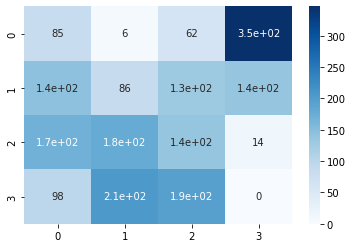

In [50]:
"""Grafico la matriz de confusion para el modelo fuzzy probabilistico""" 
sns.heatmap(confusion_matrix(y, y_pred_fuzzy), annot=True,cmap="Blues") 

In [45]:
#Imprimo el reporte con las metricas principales del fuzzy
print(classification_report(y, y_pred_fuzzy))

              precision    recall  f1-score   support

           0       0.17      0.17      0.17       500
           1       0.18      0.17      0.18       499
           2       0.26      0.28      0.27       499
           3       0.00      0.00      0.00       498

    accuracy                           0.15      1996
   macro avg       0.15      0.15      0.15      1996
weighted avg       0.15      0.15      0.15      1996



In [46]:
#Obtengo metricas de precision recall accuracy y f1
precision_fuzzy,recall_fuzzy,fscore_fuzzy,support_fuzzy=score(y,y_pred_fuzzy,average='macro')
precision_fuzzy

0.15363889217658894

## COMPARACIÓN DE LOS MODELOS NAIVE-BAYES, MARKOV Y FUZZY LOGIC

In [48]:
#Se presenta los valores de las principales metricas para los 3 algoritmos
print(acc_score_naive,precision_naive,recall_naive,fscore_naive)#Naive Bayes 
print(acc_score_markov,precision_markov,recall_markov,fscore_markov)# Markov
print(acc_score_fuzzy,precision_fuzzy,recall_fuzzy,fscore_fuzzy)# Fuzzy

0.7696160267111853 0.7751311951436828 0.7740935213484283 0.7744967518179318
0.15781563126252504 0.15995976394068834 0.15791322001432584 0.1588345128883774
0.15480961923847694 0.15363889217658894 0.15472444889779557 0.15411326025351696


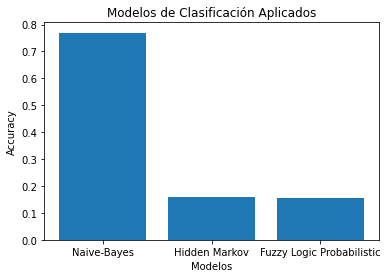

In [49]:
#Libreria para presentación de datos de comparación de resultados
import matplotlib.pyplot as plt
eje_x = ['Naive-Bayes', 'Hidden Markov', 'Fuzzy Logic Probabilistic']
 
## Declaramos valores para el eje y
eje_y = [acc_score_naive,acc_score_markov,acc_score_fuzzy]
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Accuracy')
 
## Legenda en el eje x
plt.xlabel('Modelos')
 
## Título de Gráfica
plt.title('Modelos de Clasificación Aplicados')
 
## Mostramos Gráfica
plt.show()